In [28]:
import numpy as np
import pandas as pd

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



In [30]:
from yellowbrick.classifier import confusion_matrix

In [31]:
df = pd.read_csv('letter-recognition.data')

In [32]:
df

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [33]:
x = df.iloc[:, 1:17]
y= df.select_dtypes(include = [object])

In [34]:
x

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [35]:
y

,T
0,I
1,D
2,N
3,G
4,S
...,...
19994,D
19995,C
19996,T
19997,S


In [36]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=10)

In [37]:
sc = StandardScaler()

sc.fit(x_train)

x_train = sc.transform(x_train)
x_validation = sc.transform(x_validation)

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation ='logistic')

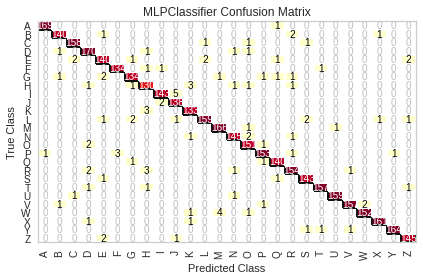

In [41]:
cm = confusion_matrix(mlp,x_train,y_train.values.ravel(), x_validation, y_validation.values.ravel(), classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [43]:
cm.fit(x_train, y_train.values.ravel())


ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7fdf95f3aa90>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [44]:
cm.score(x_validation, y_validation)

/home/nidhi/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97375

In [45]:
predictions = cm.predict(x_validation)

In [46]:
predictions

array(['C', 'I', 'H', ..., 'R', 'B', 'W'], dtype='<U1')

In [47]:
print('The accuracy score is ', accuracy_score(y_validation, predictions))

The accuracy score is  0.97375
